In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
aapl_df = yf.download("AAPL", start='2020-01-01', end='2022-01-01')

def compare_open_and_close_price(open_price, close_price):
    return 'red' if open_price>close_price else 'blue'

aapl_df['color'] = aapl_df.apply(lambda x: compare_open_and_close_price(x['Open'], x['Close']), axis=1)

aapl_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,color
Date,,,,,,,
2020-01-02 00:00:00-05:00,74.059998,75.150002,73.797501,75.087502,73.683571,135480400,blue
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.967201,146322800,blue
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.548645,118387200,blue
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,73.202728,108872000,red
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.380287,132079200,blue
...,...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.586868,74919600,blue
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.551147,79144300,red
2021-12-29 00:00:00-05:00,179.330002,180.630005,178.139999,179.380005,178.640778,62348900,blue


In [18]:
# Moving Average日均線

# 5MA
ma = 5
column_name = "MA for %s days" %(str(ma))
aapl_df[column_name] = aapl_df['Adj Close'].rolling(window=ma).mean()

# 20MA
ma = 20
column_name = "MA for %s days" %(str(ma))
aapl_df[column_name] = aapl_df['Adj Close'].rolling(window=ma).mean()

# 60MA
ma = 60
column_name = "MA for %s days" %(str(ma))
aapl_df[column_name] = aapl_df['Adj Close'].rolling(window=ma).mean()

# 1MA
aapl_df = aapl_df.rename(columns = {'Adj Close':'MA for 1 days'})

aapl_df

,Open,High,Low,Close,MA for 1 days,Volume,color,MA for 5 days,MA for 20 days,MA for 60 days
Date,,,,,,,,,,
2020-01-02 00:00:00-05:00,74.059998,75.150002,73.797501,75.087502,73.683571,135480400,blue,NaN,NaN,NaN
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.967201,146322800,blue,NaN,NaN,NaN
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.548645,118387200,blue,NaN,NaN,NaN
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,73.202728,108872000,red,NaN,NaN,NaN
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.380287,132079200,blue,73.556487,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.586868,74919600,blue,174.276831,170.756400,155.931391
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.551147,79144300,red,176.176968,171.704974,156.542992
2021-12-29 00:00:00-05:00,179.330002,180.630005,178.139999,179.380005,178.640778,62348900,blue,177.449704,172.406073,157.214260


In [19]:
colors = {'red':'#ff207c', 'grey':'#42535b', 'blue':'#207cff', 'orange':'#ffa320', 'green':'#00ec8b'}

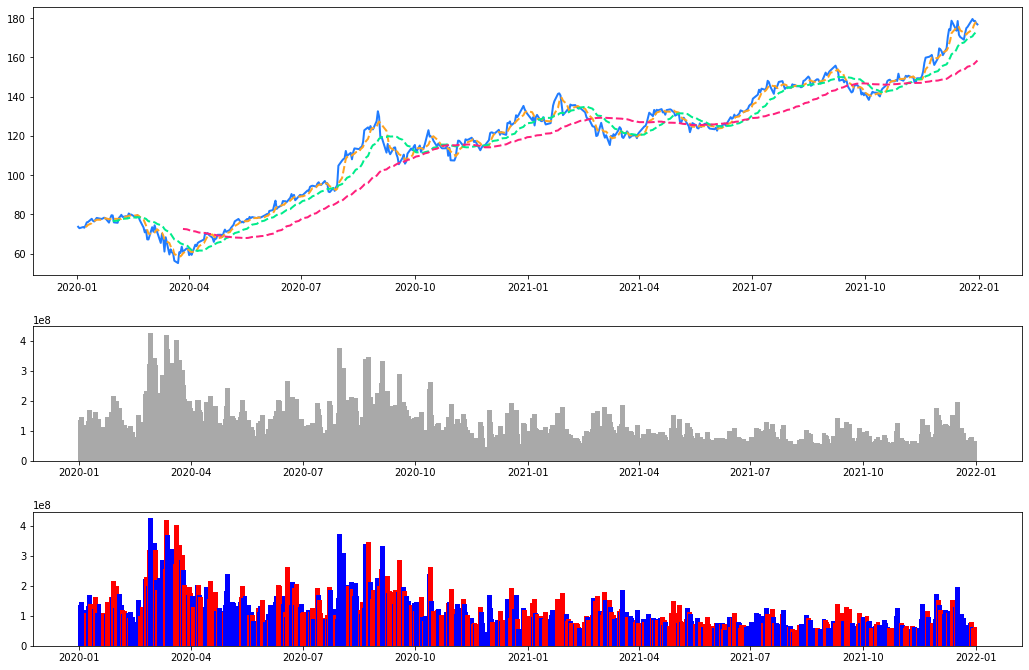

In [30]:
plt.rc('figure', figsize=(15, 10))
fig, axes = plt.subplots(
    3,
    1,
    gridspec_kw={'height_ratios':[2, 1, 1]}
)

fig.tight_layout(pad=3)

#graph 1
plot_mov_avg = axes[0]
mov_avg = {
    'MA (1)':{'Range': 1, 'Color': colors['blue'], 'Linestyle': '-'},
    'MA (5)':{'Range': 5, 'Color': colors['orange'], 'Linestyle': '--'},
    'MA (20)':{'Range': 20, 'Color': colors['green'], 'Linestyle': '--'},
    'MA (60)':{'Range': 60, 'Color': colors['red'], 'Linestyle': '--'}
}
date = aapl_df.index

plt.rc('figure', figsize=(15,10))
for ma, ma_info in mov_avg.items():
    column_name = "MA for %s days" %(str(ma_info['Range']))
    plot_mov_avg.plot(
        date, aapl_df[column_name],
        color = ma_info['Color'], label=ma, linewidth=2,
        linestyle = ma_info['Linestyle']
    )
    
#graph 2
plot_vol = axes[1]

vol = aapl_df['Volume']
vol_plot = plot_vol.bar(date, vol, width=4, color='darkgrey')

#graph 3
plot_rb_vol = axes[2]
color = aapl_df['color']
plot_rb_vol = plot_rb_vol.bar(date, vol, width=4, color=color)

